Important features: ['user_id', 'merchant_id', 'label', 'gender', 'interaction_count', 'distinct_cat_per_user_merchant', 'distinct_brand_per_user_merchant', 'purchase_frequency']


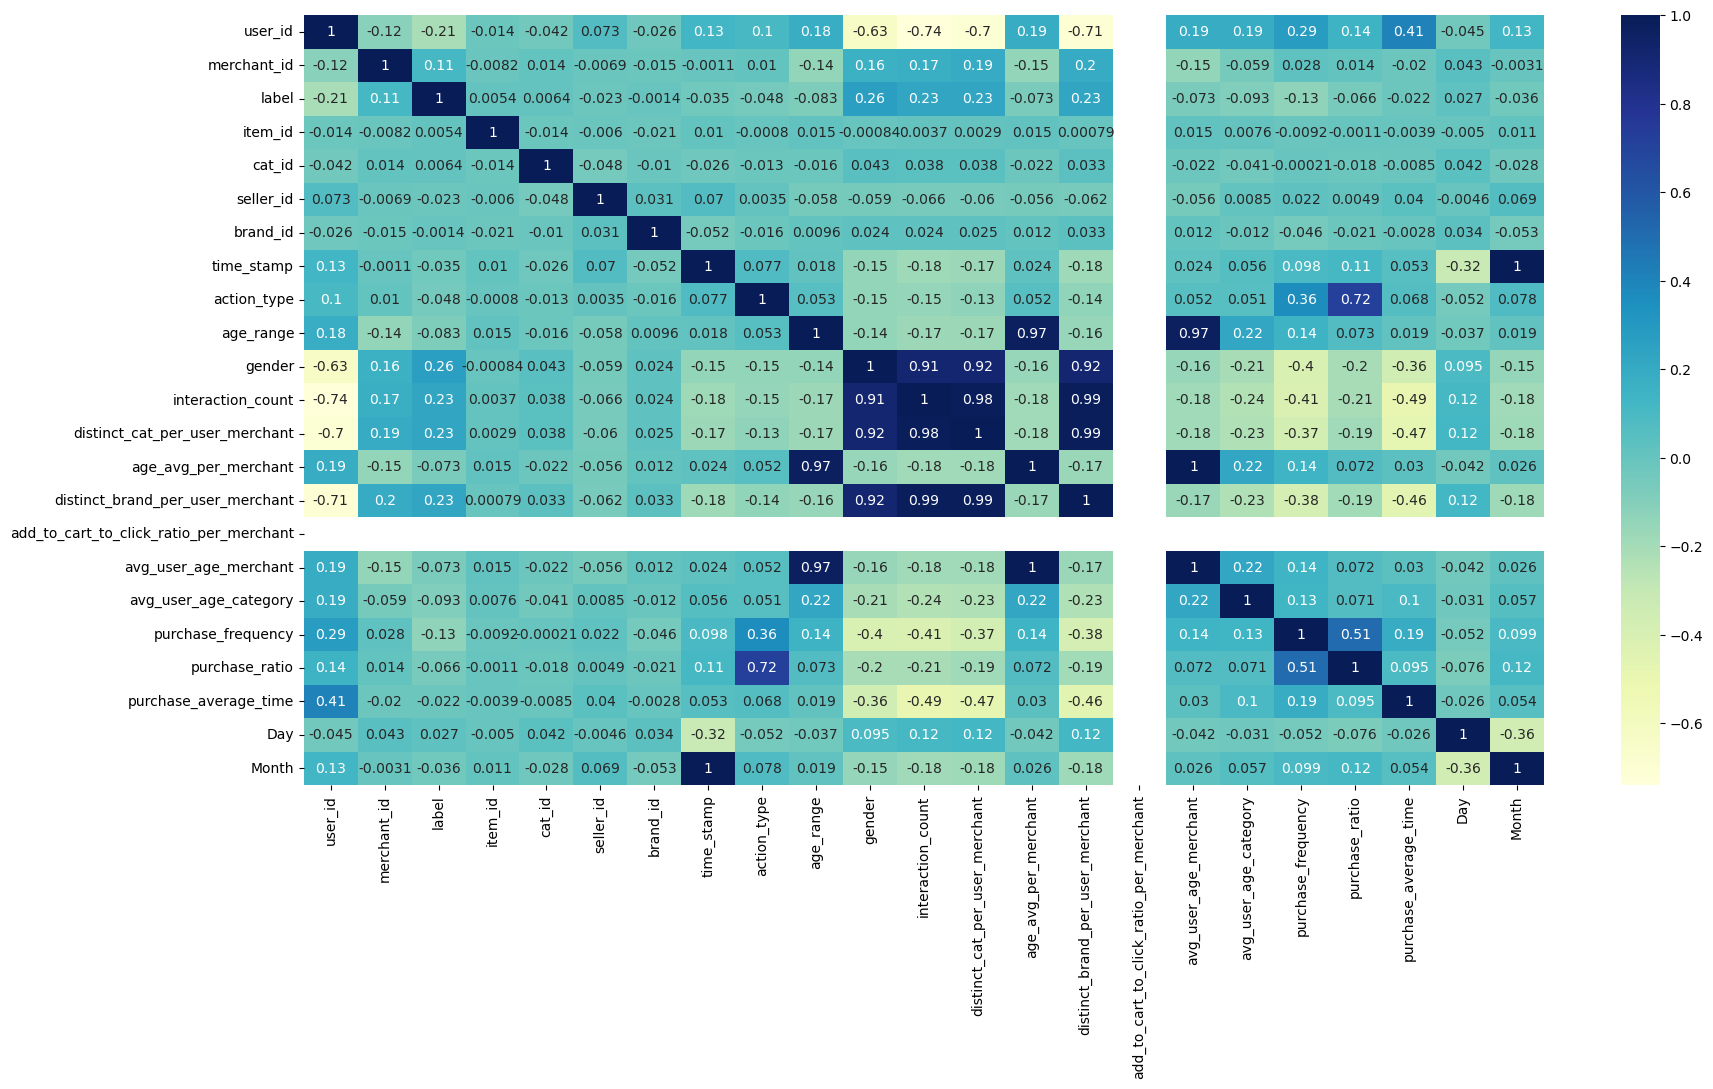

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data
data = pd.read_csv('feature_Engineered_train.csv')
# data=data.drop('repeat_buyer_count_merchant',axis=1)
# Summary statistics
# print(data.describe())

# Feature ranking using correlation
corr = data.corr()
corr_label = abs(corr['label'])
important_features = corr_label[corr_label > 0.1].index.tolist()
print('Important features:', important_features)



fig, ax = plt.subplots(figsize=(20,10))
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,)

# displaying heatmap
plt.show()
# Feature ranking using SHAP (example)
# shap_values = shap.TreeExplainer(model).shap_values(data)
# shap.summary_plot(shap_values, data)



In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap

# Load data
data = pd.read_csv('feature_Engineered_train.csv')
data=data.dropna()
# data=data.drop('repeat_buyer_count_merchant',axis=1)
# data=data.drop('user_id',axis=1)

In [3]:
# data['time_stamp'] = (data['time_stamp']).astype(int)

# # duration_in_seconds_int = int(duration_in_seconds)
# data=data.drop(['repeat_buyer_count_merchant','merchant_id','avg_user_age_merchant','age_avg_per_merchant'],axis=1)
# # data['purchase_average_time'] = pd.to_datetime(data['purchase_average_time'])
# # convert datetime objects to integers
# data['time_stamp'] = data['time_stamp'].apply(lambda x: int(x.timestamp()))
# # data['purchase_average_time'] = data['purchase_average_time'].apply(lambda x: int(x.timestamp()))
print(data.shape)
# data = data.drop_duplicates()
print(data.shape)

(23642, 23)
(23642, 23)


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


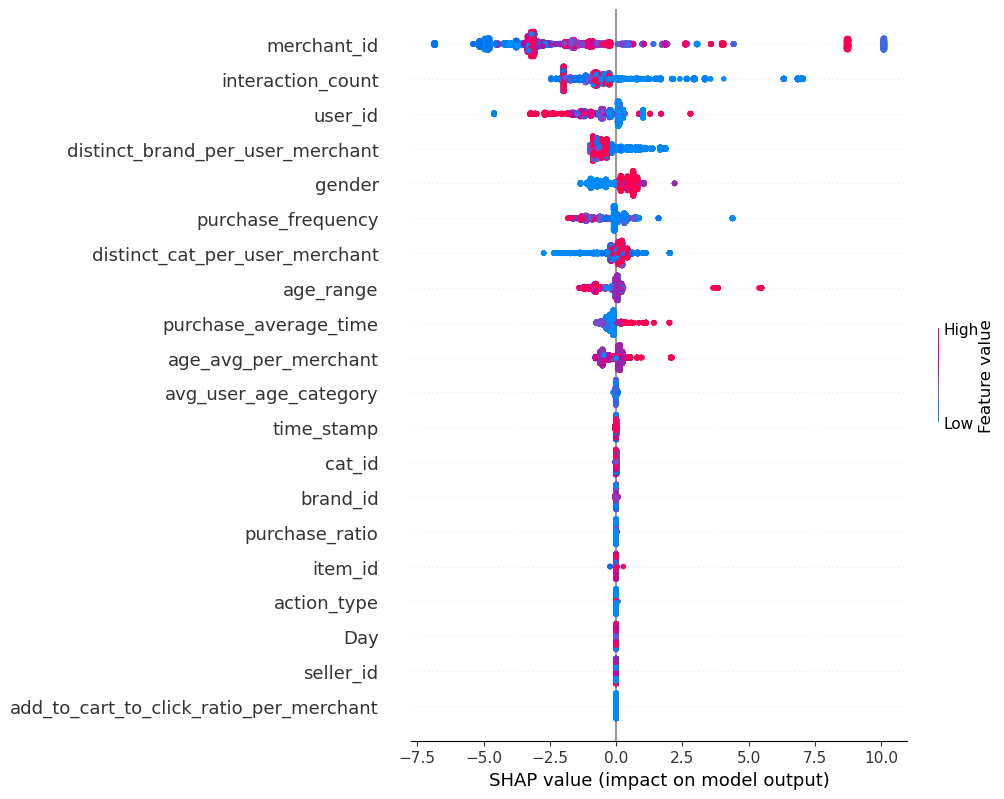

In [6]:
# Create an explainer object
explainer = shap.Explainer(clf)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize summary plot
shap.summary_plot(shap_values, X_test)




In [7]:
# One-hot encode the "gender" feature
data = pd.get_dummies(data, columns=["gender"], prefix=["isgender"])
# data=data.drop('isgender_2',axis=1)
# Print the new columns
print(data.columns)

Index(['user_id', 'merchant_id', 'label', 'item_id', 'cat_id', 'seller_id',
       'brand_id', 'time_stamp', 'action_type', 'age_range',
       'interaction_count', 'distinct_cat_per_user_merchant',
       'age_avg_per_merchant', 'distinct_brand_per_user_merchant',
       'add_to_cart_to_click_ratio_per_merchant', 'avg_user_age_merchant',
       'avg_user_age_category', 'purchase_frequency', 'purchase_ratio',
       'purchase_average_time', 'Day', 'Month', 'isgender_0', 'isgender_1',
       'isgender_2'],
      dtype='object')


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


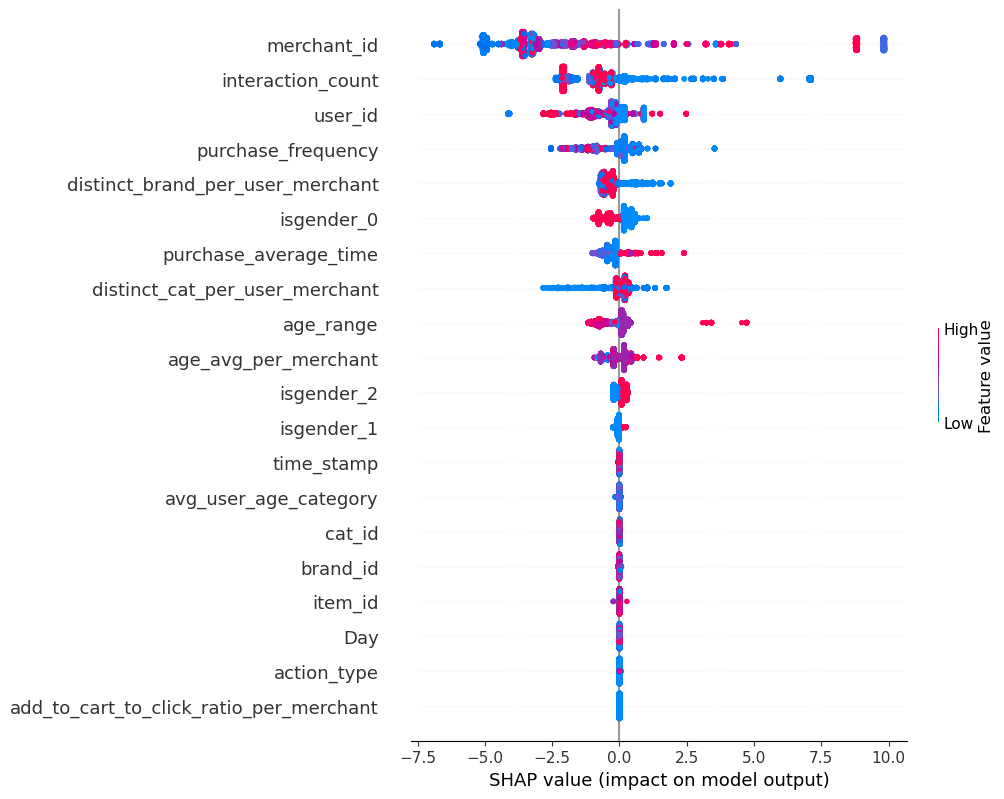

In [8]:
#can gender be feature engineered better?
from sklearn.model_selection import train_test_split
X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Train XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


# Create an explainer object
explainer = shap.Explainer(clf)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize summary plot
shap.summary_plot(shap_values, X_test)




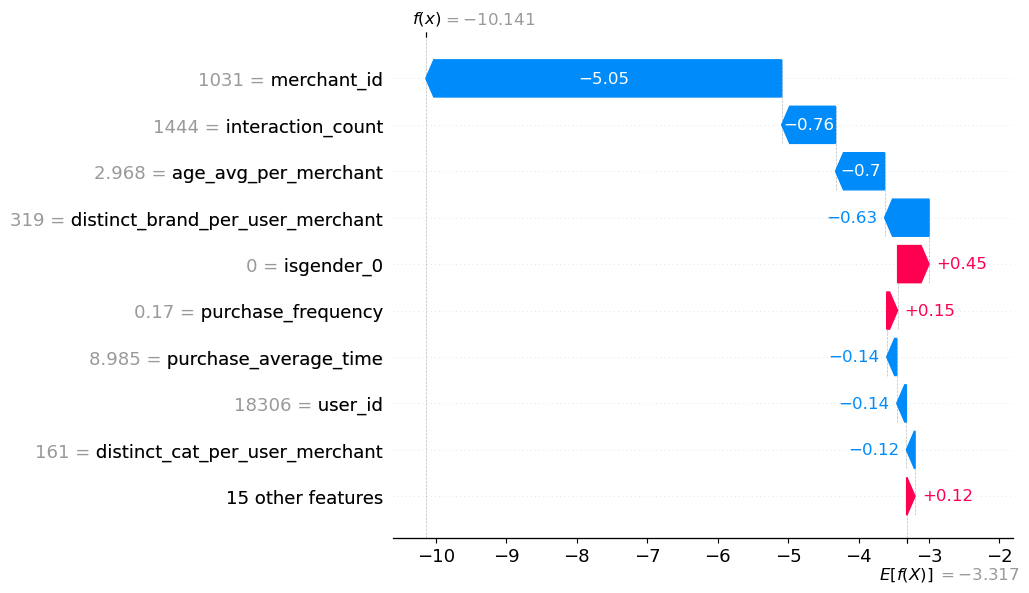

In [9]:
shap.plots.waterfall(shap_values[0])


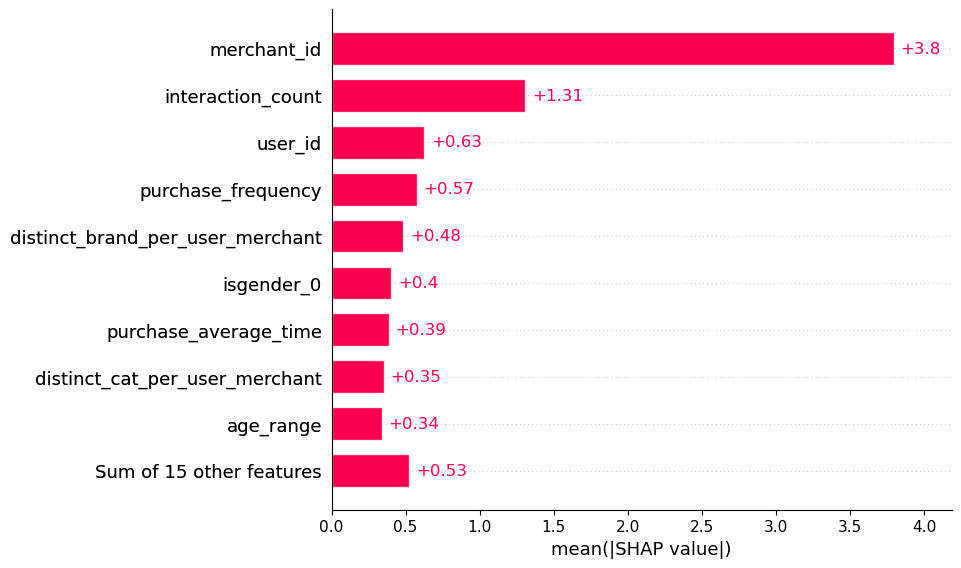

In [10]:
shap.plots.bar(shap_values)

Accuracy: 0.6240219919644745
Precision: 0.27003399708596404
Recall: 0.6690734055354994
F1 Score: 0.3847750865051903
Confusion Matrix [[2395 1503]
 [ 275  556]]


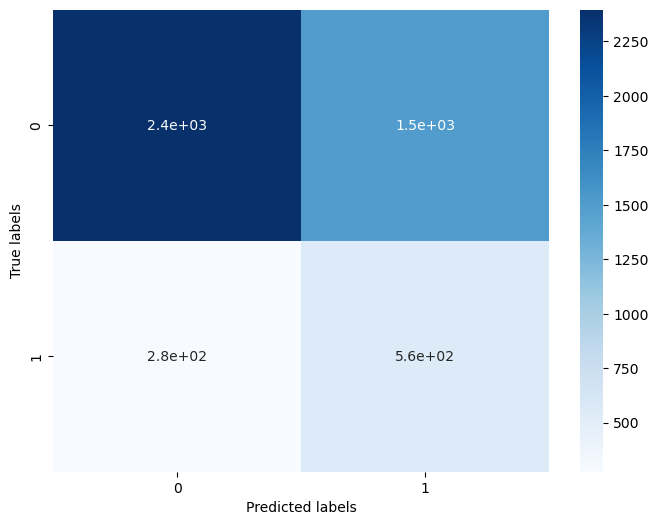

In [11]:
#before PCA 
data = pd.read_csv('feature_Engineered_train.csv')
X = data.drop(['label'], axis=1)
y = data['label']
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)


%run '../Models/performance.ipynb'
performance_scores(y_pred,y_test)

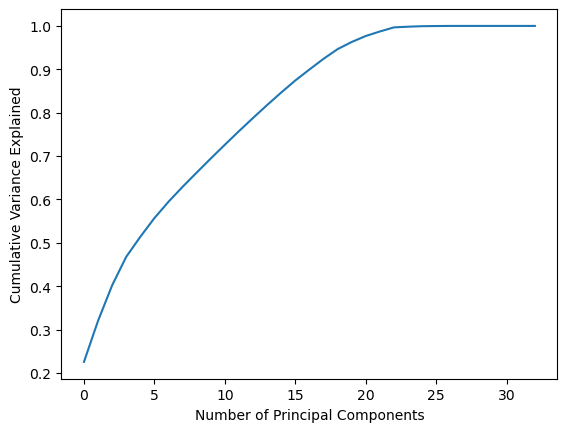

Optimal number of principal components: 20


In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('feature_Engineered_train.csv')
df=df.dropna()
# Split the data into features and target label
X = df.drop('label', axis=1)
y = df['label']
# print(y)
# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['action_type', 'age_range', 'gender'])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Plot the cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# Determine the optimal number of principal components to use
n_components = np.argmax(cumulative_variance_explained >= 0.95) + 1
print(f"Optimal number of principal components: {n_components}")

# Use the optimal number of principal components to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Accuracy: 0.8606470712624233
Precision: 0.6162162162162163
Recall: 0.5487364620938628
F1 Score: 0.5805219605346913
Confusion Matrix [[3614  284]
 [ 375  456]]


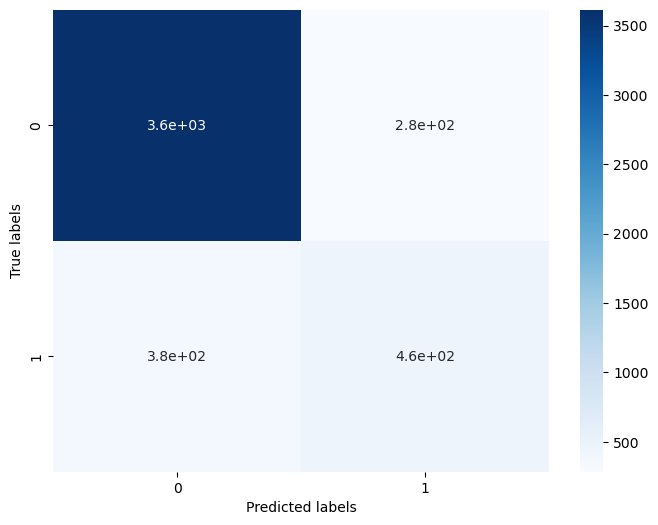

In [13]:
# Train a machine learning model on the transformed data
model = RandomForestClassifier()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

%run '../Models/performance.ipynb'
performance_scores(y_pred,y_test)

In [14]:
X_pca.shape

(23642, 20)

In [15]:
# X_pca

In [16]:
# Get the column names for the transformed dataset
columns = [f"PC{i}" for i in range(1, pca.n_components_ + 1)]
df_pca = pd.DataFrame(X_pca, columns=columns)
# print(y)
# Add the target label to the transformed dataset
df_pca['label'] = y
# df_pca['label']=df_pca['label'].astype(int)
df_pca.head()
# Save the transformed dataset to a new file
df_pca.to_csv('data_post_pca.csv', index=False)

In [17]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,label
0,2.794368,-0.929013,-1.352207,-1.894582,-1.085846,0.771788,1.839418,-2.615483,-0.059991,0.044185,...,1.961615,1.100890,-0.787425,2.446992,-2.013049,-0.542423,0.699501,-1.056877,-0.473579,0
1,2.820408,-0.833275,-1.416625,-1.918122,-1.035612,0.837798,1.751735,-1.496599,-1.691294,0.662860,...,2.198973,1.464718,-1.834300,1.974253,-1.702338,-0.652710,1.093243,-0.990536,-0.404779,0
2,3.043952,-1.095973,-1.419116,-1.937040,-0.991816,0.867231,1.768446,-1.925914,-1.355337,0.542201,...,1.419045,1.099326,0.017965,2.057412,-0.433378,-0.739313,0.731974,-0.402946,-0.534178,0
3,2.795196,-0.919856,-1.354005,-1.882509,-1.064288,0.773601,1.823199,-2.564977,-0.096437,0.347815,...,1.464408,1.295067,-0.553315,2.460267,-2.028227,-0.531742,0.678040,-1.026959,-0.479243,0
4,2.638791,-1.274479,-1.869114,0.273693,-0.576512,0.671298,1.884216,-3.097545,0.585042,1.840935,...,0.477109,1.327528,0.134552,1.384797,-0.533449,-0.995775,0.922293,-0.151628,-0.789652,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23637,1.704045,1.312909,0.682531,-1.408103,-0.409685,-0.870860,0.391194,-0.132471,-0.269482,-1.047510,...,0.785948,0.642735,1.244931,-0.759567,-0.184223,1.237777,0.382964,0.625019,0.997262,0
23638,2.204546,1.378687,3.281056,-0.219515,-1.611114,1.752659,1.755155,0.063435,-0.092691,-2.209995,...,-0.333392,0.841654,0.365186,-1.067252,0.263011,1.478169,0.339704,0.738271,0.924765,0
23639,1.121785,1.226154,-0.687581,-0.129373,-0.299429,-0.891000,0.161903,1.143961,-1.364780,-0.108133,...,0.021608,0.638716,-0.423126,0.766150,-0.320582,1.019246,0.806537,0.619122,0.762516,0
23640,1.497993,0.886610,0.054742,0.430248,-0.194064,-0.847199,0.067815,-0.259144,0.486833,0.117609,...,-1.071944,0.109236,2.190145,0.419046,0.764227,0.471665,1.192425,1.645970,0.651841,0


Accuracy: 0.8060900824698668
Precision: 0.3146551724137931
Recall: 0.08784596871239471
F1 Score: 0.13734713076199437
Confusion Matrix [[3739  159]
 [ 758   73]]


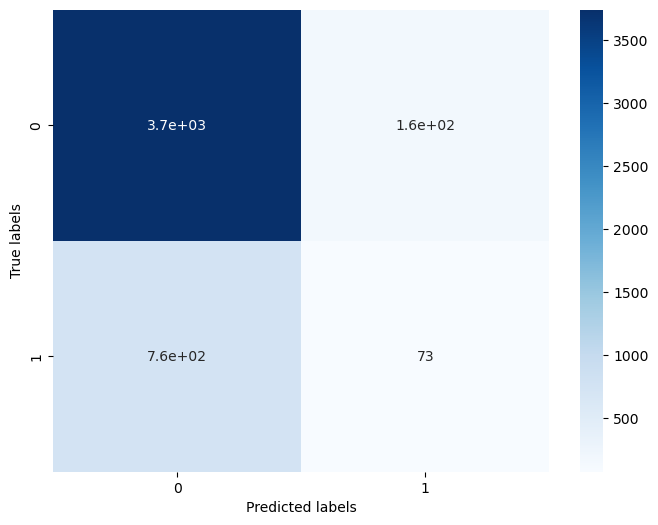

In [18]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)

%run '../Models/performance.ipynb'
performance_scores(y_pred,y_test)
# auc = roc_auc_score(y_test, y_pred)

# print("AUC:", auc)

Epoch 1/10
  1/473 [..............................] - ETA: 1:11 - loss: 0.7054 - accuracy: 0.5625

2023-05-03 08:21:20.088642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


473/473 [==============================] - 0s 632us/step - loss: 0.3869 - accuracy: 0.8307 - val_loss: 0.3548 - val_accuracy: 0.8364
Epoch 2/10
473/473 [==============================] - 0s 680us/step - loss: 0.3315 - accuracy: 0.8465 - val_loss: 0.3133 - val_accuracy: 0.8506
Epoch 3/10
473/473 [==============================] - 0s 504us/step - loss: 0.2825 - accuracy: 0.8657 - val_loss: 0.2576 - val_accuracy: 0.8977
Epoch 4/10
473/473 [==============================] - 0s 507us/step - loss: 0.2169 - accuracy: 0.9215 - val_loss: 0.1914 - val_accuracy: 0.9236
Epoch 5/10
473/473 [==============================] - 0s 497us/step - loss: 0.1645 - accuracy: 0.9305 - val_loss: 0.1536 - val_accuracy: 0.9231
Epoch 6/10
473/473 [==============================] - 0s 514us/step - loss: 0.1375 - accuracy: 0.9316 - val_loss: 0.1361 - val_accuracy: 0.9294
Epoch 7/10
473/473 [==============================] - 0s 512us/step - loss: 0.1224 - accuracy: 0.9347 - val_loss: 0.1224 - val_accuracy: 0.9323
Epo

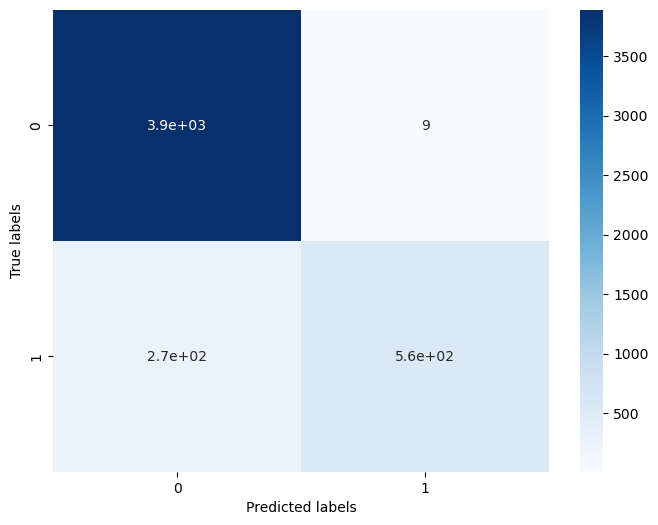

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Perform PCA
# pca = PCA(n_components=10)  # Choose the number of principal components to keep
# X_pca = pca.fit_transform(X)

# from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[-1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


y_pred = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
%run '../Models/performance.ipynb'
performance_scores(y_pred,y_test)